## EDA:

* What were the review counts by year? 

* What were the review counts by Rating?

* What are the monthly review counts over time? Consider total reviews and reviews by rating.

* What are the top 30 words used in 5 star ratings?

* What are the top 30 words used in 2 and 1 star ratings?

In [38]:
# Import the required libraries
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

%matplotlib inline

In [39]:
# Functions
def show_bar_plot(my_data, my_figsize, my_color, my_titletext, my_xlabeltext, my_ylabeltext, display_percent=False):
    my_data.plot.bar(fontsize=12, rot=30, alpha=0.85, figsize=my_figsize, color=my_color)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.yticks(size=12)
    bar_labels = my_data.values
  
    for i in range(len(my_data.values)):
        the_bar_label = bar_labels[i]
        if display_percent:
            the_bar_label = get_pretty_percent(bar_labels[i], elvie_reviews_df.shape[0]) # FIX THIS!
        plt.text(x=i, y=bar_labels[i], s=the_bar_label, size=12, rotation=20, color='black')
    plt.show()


def show_unstackedbar_plot(my_data, my_figsize, my_colormap, my_titletext, my_xlabeltext, my_ylabeltext):
    my_data.unstack().plot.bar(fontsize=12, rot=30, alpha=0.85, figsize=my_figsize, colormap=my_colormap)
    plt.grid(color='black', alpha=0.1, linestyle ='-', linewidth=1)
    plt.title(my_titletext, size='14')
    plt.xlabel(my_xlabeltext, size='12')
    plt.ylabel(my_ylabeltext, size='12')
    plt.yticks(size=12)
    plt.show()

def get_pretty_percent(x, y):
    percentage = round(x/y, 3)
    return "{:.1%}".format(percentage)

In [40]:
# Read in the collected and prepared data
elvie_reviews_df = pd.read_csv('../data/elvie_trustpilot_prepped_reviews.csv')


In [41]:
elvie_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               1500 non-null   object
 1   star_rating      1500 non-null   object
 2   location         1500 non-null   object
 3   datetime         1500 non-null   object
 4   content          1500 non-null   object
 5   reviewYear       1500 non-null   int64 
 6   reviewYearMonth  1500 non-null   object
 7   rating           1500 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 93.9+ KB


In [42]:
# min and max year for Review - Assuming time is in GMT. Verify this if possible.
print(f"min review time: {elvie_reviews_df['datetime'].min()}")
print(f"max review time: {elvie_reviews_df['datetime'].max()}")

min review time: 2019-12-29 09:47:28+00:00
max review time: 2021-06-20 21:54:01+00:00



### Question: What were the review counts by year? 

### Answer: Counts are below. There were very vew reviews for  2019, which is to be expected as we only have data for December 2019. It is interesting to note that 2021 has almost 4 times the number of reviews submitted over the entire year of 2020. 2021 reviews only cover 6 months of the year so far. 

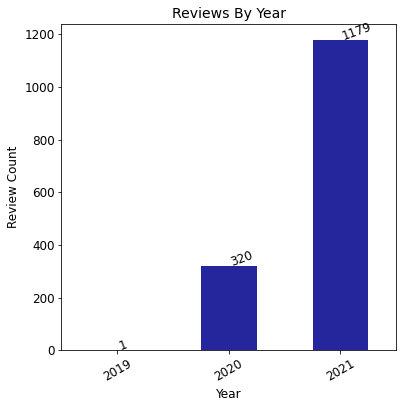

In [43]:
by_year = elvie_reviews_df.groupby(['reviewYear'])['id'].count()
by_year.sort_index()

show_bar_plot(my_data=by_year, 
              my_figsize=(6,6), 
              my_color='darkblue', 
              my_titletext='Reviews By Year', 
              my_xlabeltext='Year',
              my_ylabeltext='Review Count')


### Question: What were the review counts by Rating?

### Answer: 
* 67.5% of reviews were 5 star reviews.
* 15.6% of reviews were 1 star reviews.
* 16.9% of reviews were "mid-range" at 4,3,or 2.

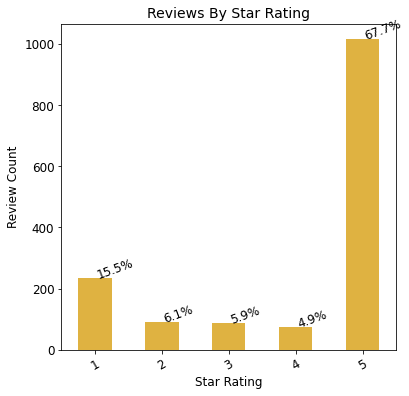

In [44]:
by_rating = elvie_reviews_df.groupby(['rating'])['id'].count()
by_rating.sort_index()

show_bar_plot(my_data=by_rating, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='Review Count',
              display_percent=True)

In [45]:
by_location = elvie_reviews_df.groupby(['location'])['id'].count()
by_location.sort_values()


location
AE      1
IN      1
LT      1
PE      1
HU      1
HR      1
PH      1
GT      1
PK      1
IT      1
VN      1
SA      1
SE      1
SI      1
TR      1
BA      1
TW      1
VE      1
FI      1
TT      2
QA      2
JE      2
DE      2
AT      2
IL      2
ES      2
FR      2
HK      2
MX      3
NO      3
MY      3
ZA      3
SG      4
CH      5
BE      5
IE      9
NL     10
AU     10
CA     19
GB    445
US    944
Name: id, dtype: int64

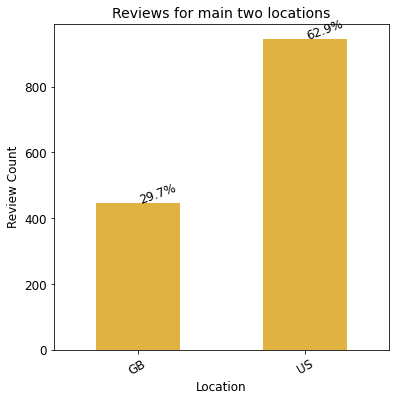

In [46]:
by_primary_locations = elvie_reviews_df[elvie_reviews_df['location'].isin(['GB','US'])].groupby(['location'])['id'].count()
by_primary_locations.sort_values()

show_bar_plot(my_data=by_primary_locations, 
              my_figsize=(6,6), 
              my_color='goldenrod', 
              my_titletext='Reviews for main two locations', 
              my_xlabeltext='Location',
              my_ylabeltext='Review Count',
              display_percent=True)

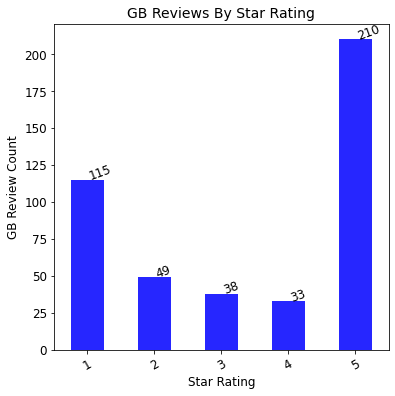

In [47]:
gb_ratings = elvie_reviews_df[elvie_reviews_df['location'] =='GB'].groupby(['rating'])['id'].count()
gb_ratings.sort_index()

show_bar_plot(my_data=gb_ratings, 
              my_figsize=(6,6), 
              my_color='blue', 
              my_titletext='GB Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='GB Review Count')


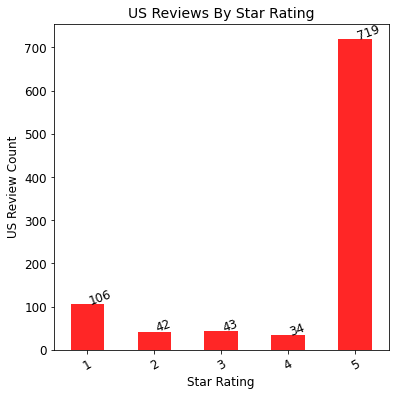

In [48]:
us_ratings = elvie_reviews_df[elvie_reviews_df['location'] =='US'].groupby(['rating'])['id'].count()


show_bar_plot(my_data=us_ratings, 
              my_figsize=(6,6), 
              my_color='red', 
              my_titletext='US Reviews By Star Rating', 
              my_xlabeltext='Star Rating',
              my_ylabeltext='US Review Count')

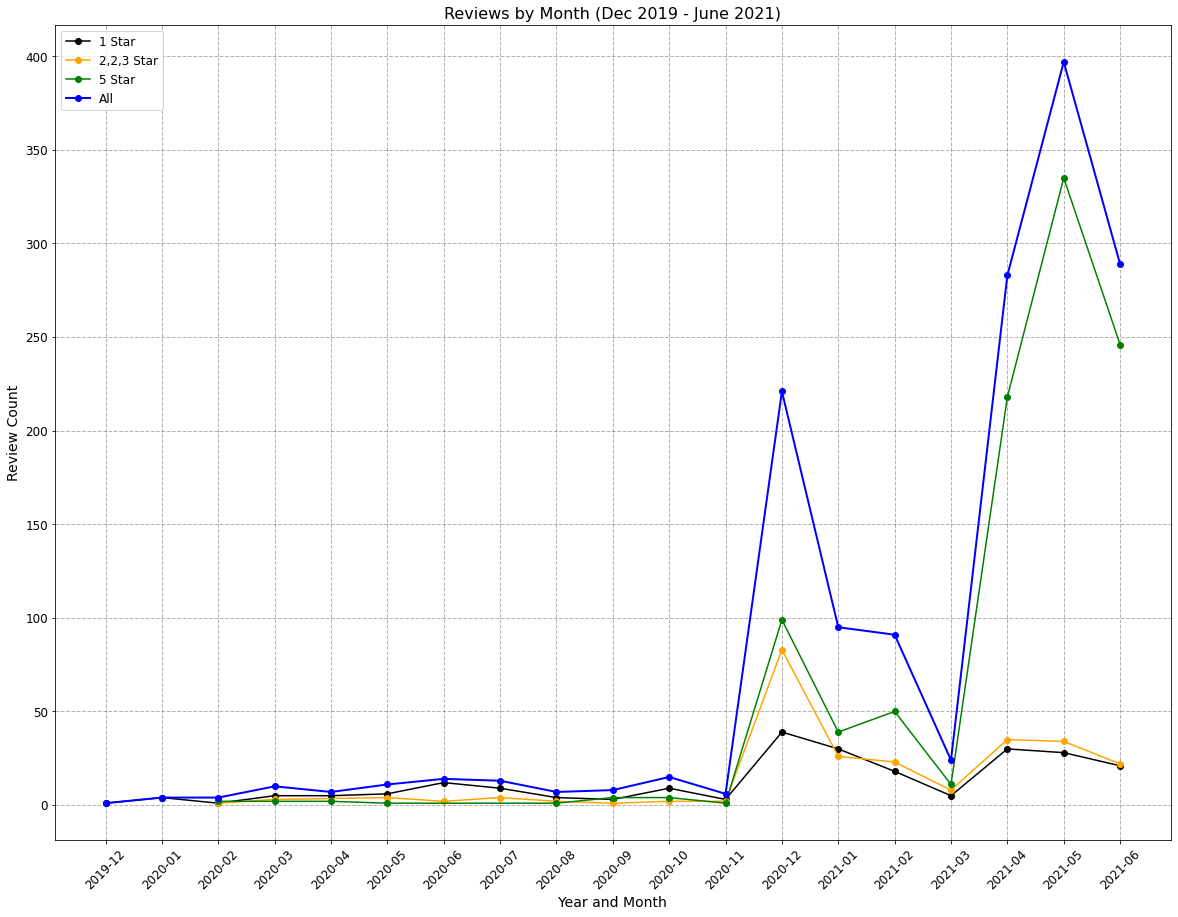

In [49]:
star1_reviews_by_ym  = elvie_reviews_df[elvie_reviews_df['rating'] == 1].groupby(['reviewYearMonth'])['id'].count()
mid_reviews_by_ym = elvie_reviews_df[elvie_reviews_df['rating'].isin([2,3,4])].groupby(['reviewYearMonth'])['id'].count()
star5_reviews_by_ym  = elvie_reviews_df[elvie_reviews_df['rating'] == 5].groupby(['reviewYearMonth'])['id'].count()
all_reviews_by_ym = elvie_reviews_df.groupby(['reviewYearMonth'])['id'].count()


plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the x tick labels
plt.rc('ytick', labelsize=12) #fontsize of the y tick labels
plt.rc('legend', fontsize=12) #fontsize of the legend

plt.figure(figsize=(20, 15))
plt.plot(star1_reviews_by_ym.index, star1_reviews_by_ym, color='black', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(mid_reviews_by_ym.index, mid_reviews_by_ym, color='orange', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(star5_reviews_by_ym.index, star5_reviews_by_ym, color='green', linewidth=1.5, marker='o', linestyle='solid')
plt.plot(all_reviews_by_ym.index, all_reviews_by_ym, color='blue', linewidth=2.0, marker='o', linestyle='solid')
plt.xticks(rotation=45)
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)

plt.title('Reviews by Month (Dec 2019 - June 2021)')
plt.xlabel('Year and Month')
plt.ylabel('Review Count')
plt.legend(['1 Star','2,2,3 Star', '5 Star', 'All'], loc=2)

plt.show()

## Text Analysis


In [50]:
from text_analysis_functions import process_text
from text_analysis_functions import get_eng_stopwords_list
from text_analysis_functions import plot_word_cloud

In [51]:
# Create word clouds of the most common words in 5 star Reviews and 4-1, and 1 star Reviews
eng_stopwords = get_eng_stopwords_list(added_words_list=['elvie'])
top_rated_review_words = list()
mid_rated_review_words = list()
low_rated_review_words = list()

for rev in elvie_reviews_df[elvie_reviews_df['rating'] == 5]['content'].to_list():
    processed_review = process_text(rev, eng_stopwords)
    for word in processed_review:
        top_rated_review_words.append(word)

for rev in elvie_reviews_df[elvie_reviews_df['rating'].isin([3,4])]['content'].to_list():
    processed_review = process_text(rev, eng_stopwords)
    for word in processed_review:
        mid_rated_review_words.append(word)

for rev in elvie_reviews_df[elvie_reviews_df['rating'].isin([2,1])]['content'].to_list():
    processed_review = process_text(rev, eng_stopwords)
    for word in processed_review:
        low_rated_review_words.append(word)

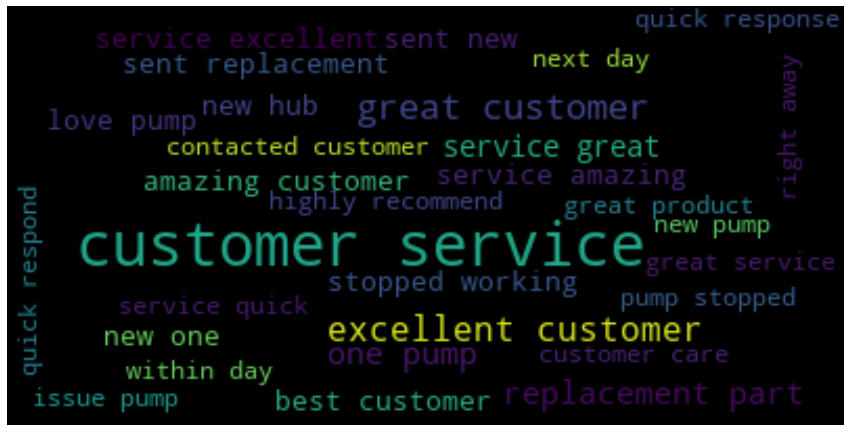

In [52]:
high_rating_text = ' '.join(word for word in top_rated_review_words)
plot_word_cloud(text=high_rating_text, word_max=30)

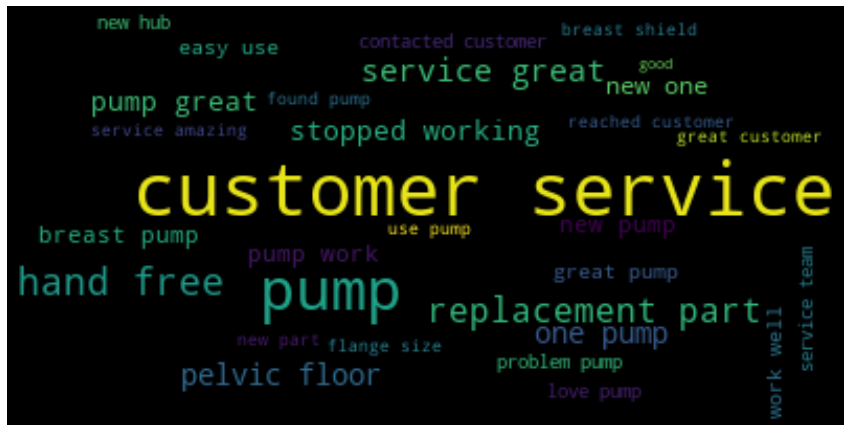

In [53]:
mid_rating_text = ' '.join(word for word in mid_rated_review_words)
plot_word_cloud(text=mid_rating_text, word_max=30)

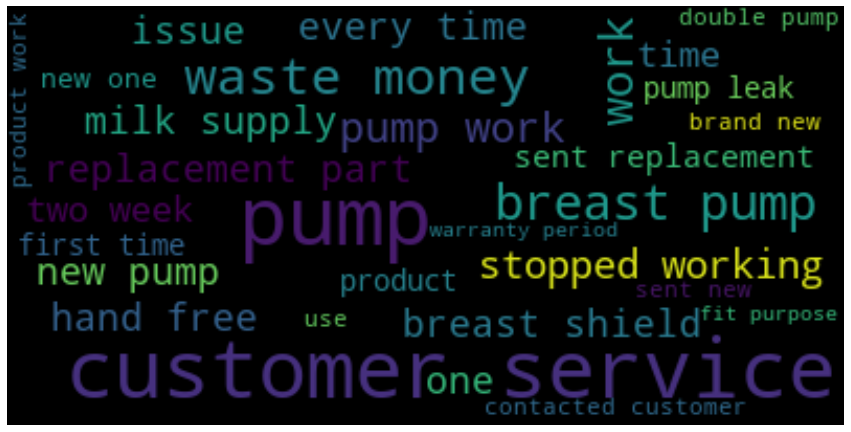

In [54]:
low_rating_text = ' '.join(word for word in low_rated_review_words)
plot_word_cloud(text=low_rating_text, word_max=30)